In [1]:
# enables auto-reload of files (%...function MUST BE WITHOUT SPACE!)
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
import utils
from nutrition_scores import score_util
from  exploration import exploration_util
import matplotlib.pyplot as plt
import matplotlib.ticker as pltt
import seaborn as sns
import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

In [3]:
# Define data locations
data_location = 'C:\\Users\\beatr\\Desktop\\Estágio\\data\\original'
graph_location = 'C:\\Users\\beatr\\Desktop\\Estágio\\data\\food_kg'
additional_location = 'C:\\Users\\beatr\\Desktop\\Estágio\\data\\original' # if not present set recipe_tags=False

-----------------------------------------------------------
# Load & clean Dataset
-----------------------------------------------------------

In [5]:
# Import & clean data
recipes_df, reviews_df, users_df, recipes_dict, user_dict, food_locator_dict, food_com_dict, data = utils.load_and_clean_data(data_location, additional_location, k_user=1, k_recipe=1,
                                                                                  add_recipe_columns=['food_kg_locator'],
                                                                                  authorship_relations=6, recipe_tags=False, debug=True)

[0] Read recipes, reviews & users ...


TypeError: read_csv() got an unexpected keyword argument 'date_format'

In [7]:
# Compute a dataframe consisting of nutrients normalized on 100g (takes ~15min), only necessary for the food score calculation
normalized_ingredients = utils.normalize_ingredients(recipes_df)

In [8]:
# Get all foodKG ingredient links
ingredients_df, ingredients_dict, mapped_recipes = utils.load_ingredient_dict(recipes_df, graph_location)

In [9]:
# Get food product label dict (from our data set)
label_dict = utils.load_ingredient_tags(graph_location)

-----------------------------------------------------------
# Calculate food scores
-----------------------------------------------------------

In [30]:
# Calculate food scores.
recipes_df = score_util.calculate_food_scores(recipes_df, normalized_ingredients, score_names=['who', 'fsa', 'nutri'], normalize=True)
recipes_df.head()

,title,description,duration,directions,ingredients,serves,rating,last_changed_date,food_kg_locator,food_kg_locator,...,totalCarbohydrate [g],dietaryFiber [g],sugars [g],protein [g],direction_size,ingredients_sizes,who_score,fsa_score,nutri_score,normalization_comment
0,Cranberry-Orange Caramel Corn,"Taken from Beter Homes and Gardens, November 2...",40.0,[Preheat oven to 275 degrees. In a very large ...,"{'': [(12.0, 'cups popcorn, popped'), (1.0, 'c...",20,"(0,0)",2011-01-29,http://idea.rpi.edu/heals/kb/recipe/5e6ae80d-C...,http://idea.rpi.edu/heals/kb/recipe/5e6ae80d-C...,...,9.9,0.7,6.9,0.8,9,9,0.168254,0.000,0.00,
1,Cocktail De Camarones,I ordered shrimp cocktail at a Mexican restaur...,20.0,"[After you chop the tomatoes, onions and cilan...","{'': [('1 -2 ', 'lb shelled and cooked shrimp ...",2-4,"(5,5)",2009-06-03,http://idea.rpi.edu/heals/kb/recipe/d6b47db2-C...,http://idea.rpi.edu/heals/kb/recipe/d6b47db2-C...,...,17.8,9.4,6.3,51.3,7,10,0.335455,0.625,0.25,
2,Inbal Jerusalem Hotel Snowball,This recipe was created in response to a Janua...,210.0,"[Combine gelatin with cold water, Combine crea...","{'': [(200.0, 'g cream'), (1.0, 'vanilla bean'...",5,"(0,0)",2015-01-08,http://idea.rpi.edu/heals/kb/recipe/29080638-I...,http://idea.rpi.edu/heals/kb/recipe/29080638-I...,...,85.3,0.3,78.0,87.7,12,17,0.128082,0.000,0.00,
3,Santorini Roasted Leg of Lamb,A succulent slow-roasted leg of lamb with herb...,375.0,[Trim excess fat and silver skin from lamb leg...,"{'': [(6.0, 'lbs leg of lamb'), (0.25, 'cup dr...",10-12,"(4.5,2)",2009-05-17,http://idea.rpi.edu/heals/kb/recipe/6af68948-S...,http://idea.rpi.edu/heals/kb/recipe/6af68948-S...,...,7.6,2.0,3.6,51.1,8,8,0.320622,0.375,0.00,
4,Cantonese Chicken Burgers,Adapted from a recipe in BHG's grilling magazine.,38.0,"[In a mixing bowl, add the egg, sesame oil, an...","{'': [(1.0, 'egg, beaten'), (1.0, 'teaspoon to...",4,"(0,0)",2007-11-21,http://idea.rpi.edu/heals/kb/recipe/83f130d0-C...,http://idea.rpi.edu/heals/kb/recipe/83f130d0-C...,...,39.6,3.0,4.2,30.3,6,12,0.254427,0.500,0.25,


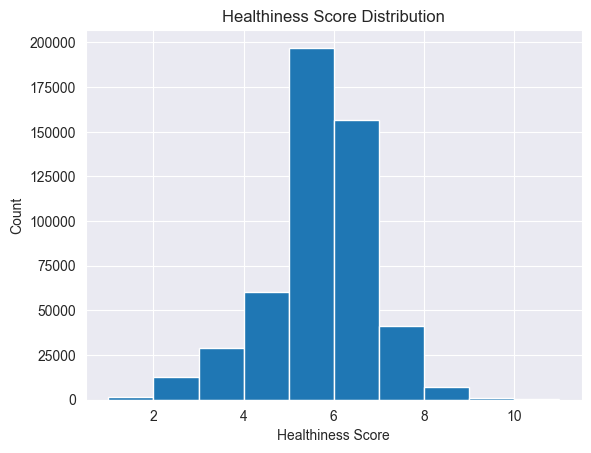

In [11]:
# Plot the score distribution histogram
plt.hist(recipes_df['who_score'], bins=10)
# Add labels and title
plt.xlabel('Healthiness Score')
plt.ylabel('Count')
plt.title('Healthiness Score Distribution')
# Show the plot
plt.show()

In [12]:
# Store preprocessed data
recipes_df.to_csv(data_location + 'pp_recipes.csv')
users_df.to_csv(data_location + 'pp_members.csv')
reviews_df.to_csv(data_location + 'pp_reviews.csv')

-----------------------------------------------------------
# Explore data set
-----------------------------------------------------------

In [36]:
# Merge data (again, because scores were not available before)
data_scores = pd.merge(recipes_df, reviews_df, right_on='new_recipe_id', left_on='new_recipe_id')

# Copy data set for exploration and remove ingredient/duration/direction_size outliers (to compute nicer pictures)
data_vis = exploration_util.remove_outliers(data_scores, ["duration", "direction_size", "totalFat [g]", "calories [cal]", "totalCarbohydrate [g]", "sugars [g]"])

Removed 0 outliers of duration.
Removed 60059 outliers of direction_size.
Removed 129546 outliers of totalFat [g].
Removed 47705 outliers of calories [cal].
Removed 53860 outliers of totalCarbohydrate [g].
Removed 138141 outliers of sugars [g].


(0.0, 20.0)

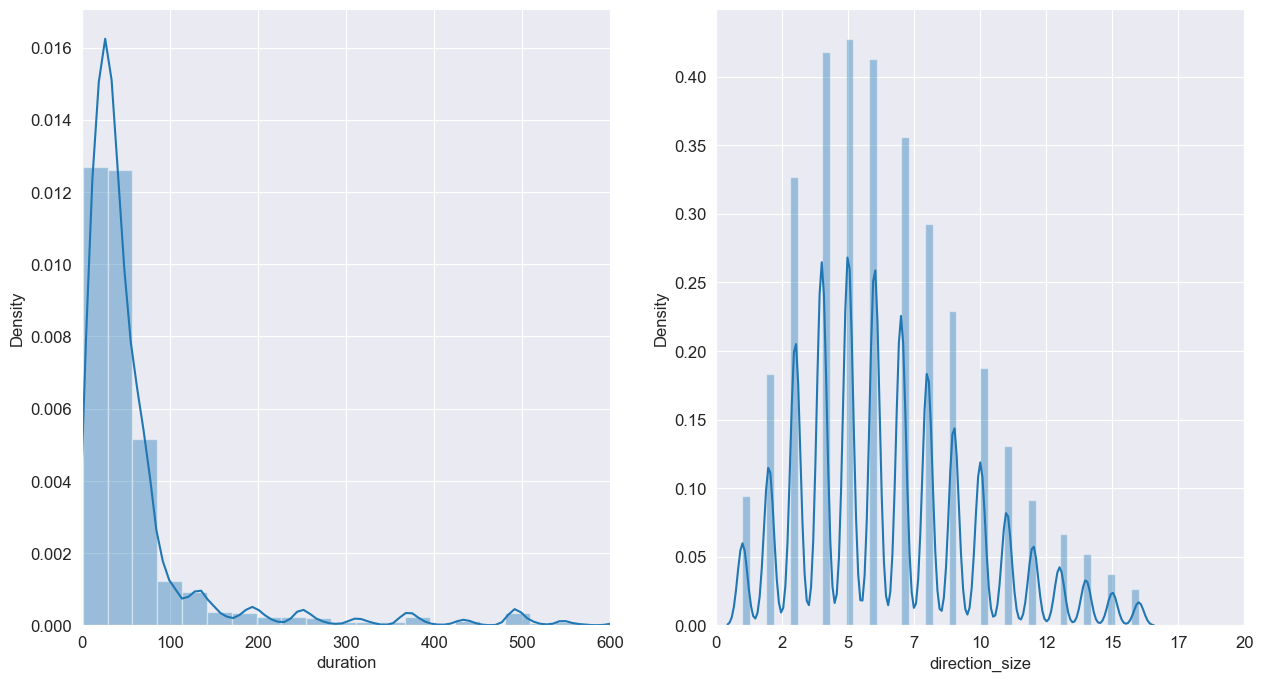

In [37]:
# Plot duration & direction_size distribution
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.distplot(data_vis["duration"], ax=ax[0]).set_xlim(0, 600)
ax[1].xaxis.set_major_formatter(pltt.FuncFormatter(lambda x, _: int(x)))
sns.distplot(data_vis["direction_size"], ax=ax[1]).set_xlim(0, 20)

<Axes: xlabel='totalFat [g]', ylabel='Density'>

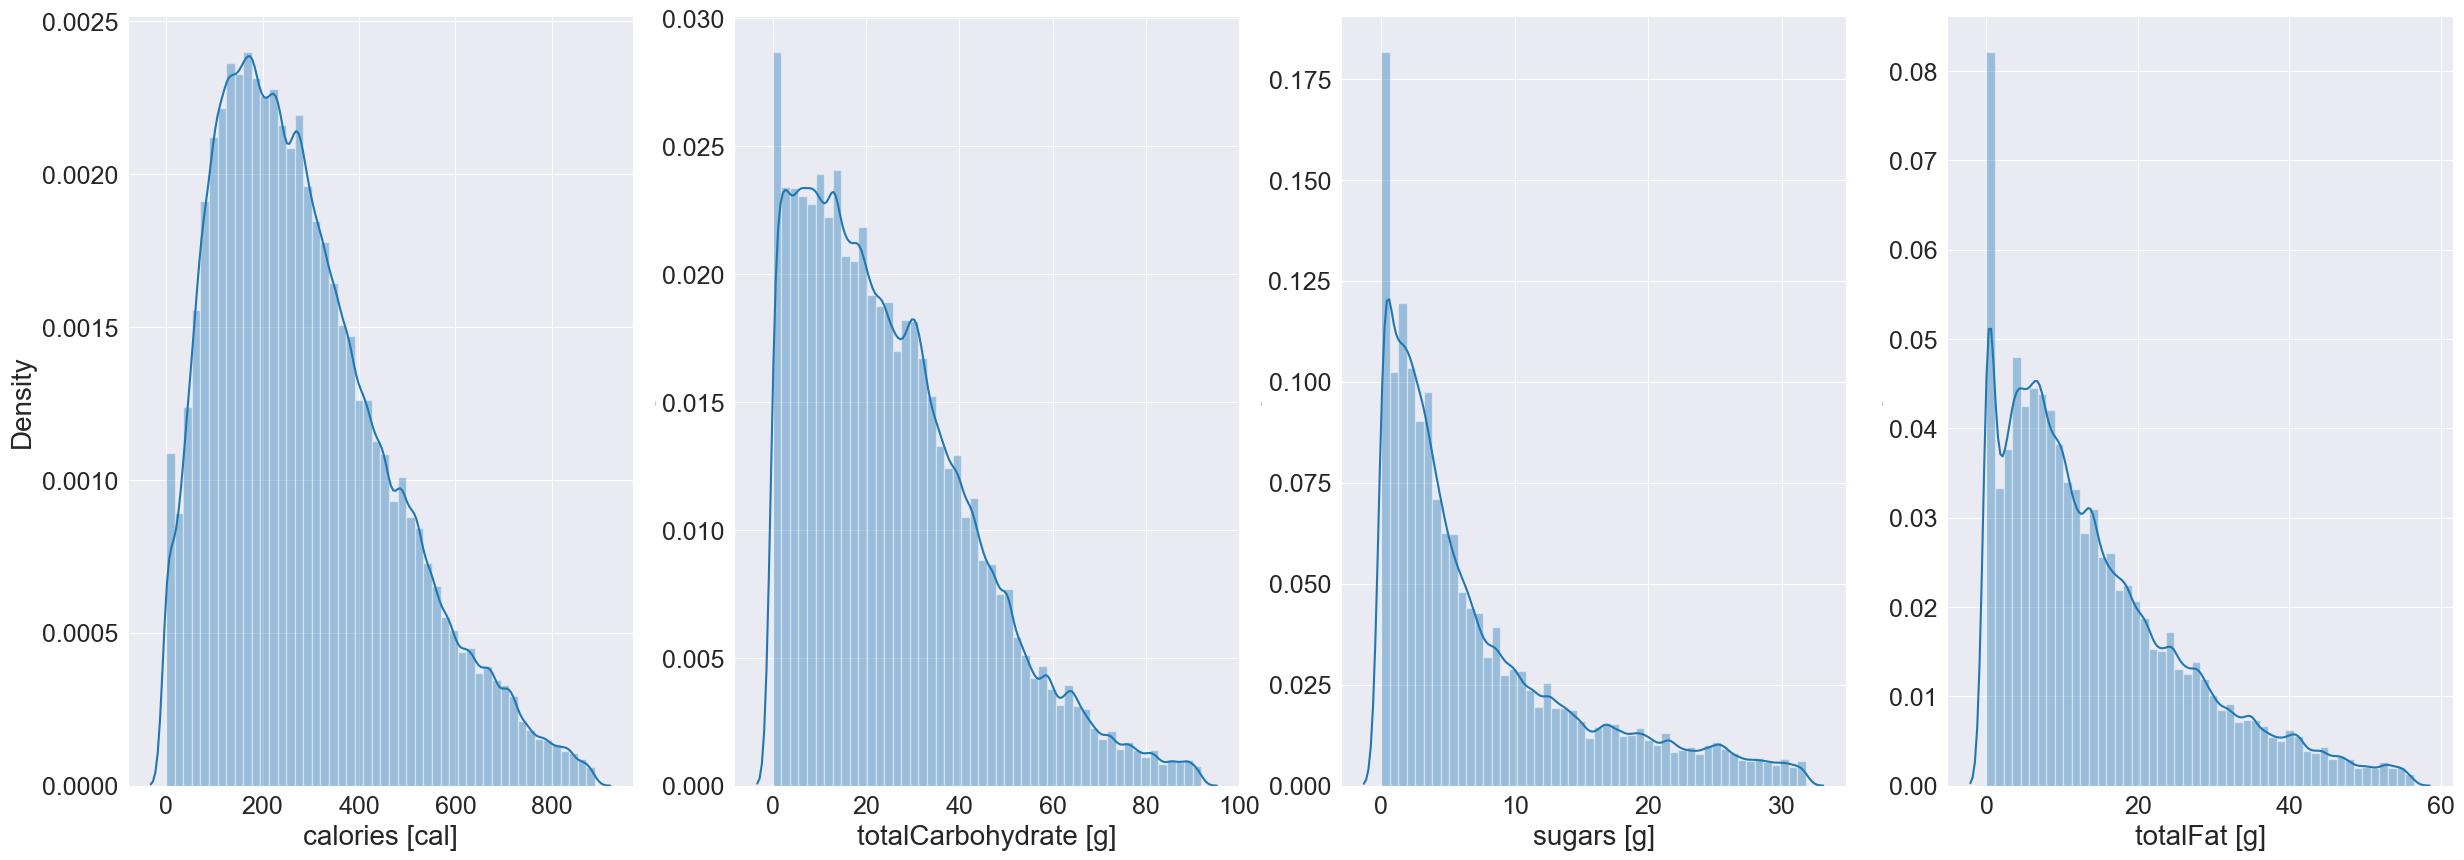

In [38]:
# Plot ingredient distribution
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(1, 4, figsize=(30, 10))
ax[0].set_ylabel('Density', fontsize = 20)
ax[0].set_xlabel('calories [cal]', fontsize = 20)
sns.distplot(data_vis["calories [cal]"].to_numpy(), ax=ax[0])
ax[1].set_ylabel('', fontsize = 0)
ax[1].set_xlabel('totalCarbohydrate [g]', fontsize = 20)
sns.distplot(data_vis["totalCarbohydrate [g]"].to_numpy(), ax=ax[1])
ax[2].set_ylabel('', fontsize = 0)
ax[2].set_xlabel('sugars [g]', fontsize = 20)
sns.distplot(data_vis["sugars [g]"].to_numpy(), ax=ax[2])
ax[3].set_ylabel('', fontsize = 0)
ax[3].set_xlabel('totalFat [g]', fontsize = 20)
sns.distplot(data_vis["totalFat [g]"].to_numpy(), ax=ax[3])

In [ ]:
# Format data for heatmap
data_vis = data_vis.rename(columns={'servingSize [g]':'serSize', 'calories [cal]':'calories', 'caloriesFromFat [cal]':'calFromFat', 'totalFat [g]':'totalFat', 'cholesterol [mg]':'cholesterol', 'sodium [mg]':'sodium', 'dietaryFiber [g]':'dietaryFiber', 'sugars [g]':'sugars', 'protein [g]':'protein', 'saturatedFat [g]': 'satFat', 'totalCarbohydrate [g]': 'totalCarbs', 'direction_size': '#steps', 'ingredients_sizes': '#ingred', 'rating_y': 'rating'})
data_vis.drop(["new_recipe_id"], axis=1, inplace=True)
data_vis.drop(["servingsPerRecipe"], axis=1, inplace=True)
data_vis.drop(["new_member_id"], axis=1, inplace=True)
data_vis.drop(["new_author_id"], axis=1, inplace=True)

<Axes: >

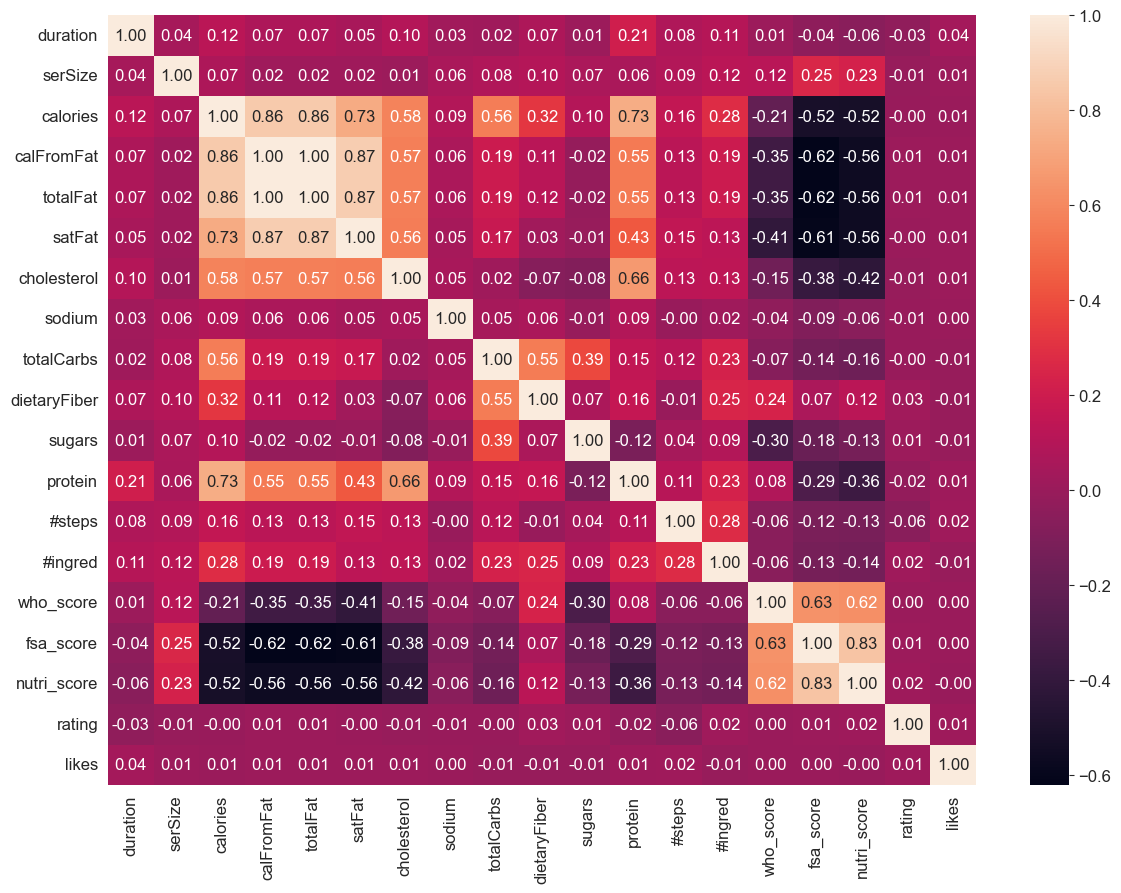

In [40]:
# Plot heatmap of nutrients, direction_size, ingredient_size and ratings to show correlations
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(14, 10))
sns.heatmap(data_vis.corr(), annot=True, fmt='.2f')

-----------------------------------------------------------
# Simple example recommender
-----------------------------------------------------------
## Implicit Lib

In [ ]:
from recommendation import implicit_util
from scipy.sparse import csr_matrix
import implicit.evaluation

In [ ]:
# Build a sparse matrix (user x recipe x ratings)
user_recipe_matrix = csr_matrix((reviews_df['rating'], (reviews_df['new_member_id'], reviews_df['new_recipe_id'])))

# All users and recipes
users = list(user_dict.keys())
recipes = list(recipes_dict.keys())

# Test/train split #Alternatively use implicit.evaluation.leave_k_out_split to force each user being in both sets
train_matrix, test_matrix = implicit.evaluation.train_test_split(user_recipe_matrix.tocsr().tocoo())

# Get users/recipes in the train set (or test set respectively)
train_user, train_recipe = implicit_util.tuple_to_unique(train_matrix.tocsr().nonzero())
test_user, test_recipe = implicit_util.tuple_to_unique(test_matrix.tocsr().nonzero())

In [ ]:
# Calculate the sparsity [in %]
A = user_recipe_matrix.toarray()
sparsity = 1.0 - (np.count_nonzero(A) / float(A.size) )
print(sparsity * 100)

In [ ]:
# Executes all models, exception on Windows/Python3.10: nmslib_als, faiss_als
evaluation, recommendations, similar_items, similar_users = implicit_util.train_and_execute_all(train_matrix, test_matrix, train_user, train_recipe, ['nmslib_als', 'faiss_als'], K=10)

In [ ]:
# Show evaluation results
evaluation

## Irec Lib

In [ ]:
from recommendation import irec_util
from irec.environment.loader.full_data import FullData
from irec.recommendation.agents.simple_agent import SimpleAgent
from irec.recommendation.agents.action_selection_policies.egreedy import ASPEGreedy
from irec.recommendation.agents.value_functions.e_greedy import EGreedy
from irec.offline_experiments.evaluation_policies.fixed_interaction import FixedInteraction
from irec.offline_experiments.metric_evaluators.user_cumulative_interaction import UserCumulativeInteraction
from irec.recommendation.agents.action_selection_policies.greedy import ASPGreedy
from irec.recommendation.agents.value_functions.best_rated import BestRated
from irec.recommendation.agents.value_functions.entropy0 import Entropy0
from irec.recommendation.agents.value_functions.ictr import ICTRTS
from irec.recommendation.agents.value_functions.knn_bandit import kNNBandit
from irec.recommendation.agents.value_functions.log_pop_ent import LogPopEnt
from irec.recommendation.agents.value_functions.most_popular import MostPopular
from irec.recommendation.agents.value_functions.pts import PTS
from irec.recommendation.agents.value_functions.random import Random
from irec.recommendation.agents.value_functions.thompson_sampling import ThompsonSampling

In [ ]:
# Build interaction matrix
pp_interactions = reviews_df[['new_member_id', 'new_recipe_id', 'rating', 'last_modified_date']]
pp_interactions = pp_interactions.rename(columns={'new_member_id': 'user_id', 'new_recipe_id': 'item_id', 'last_modified_date': 'timestamp'})

# Change timestamps and ratings to int
pp_interactions['timestamp'] = pp_interactions.timestamp.values.astype(np.int64)
pp_interactions['rating'] = pp_interactions['rating'].astype(int)

In [ ]:
# Store preprocessed data
output_path = './data/irec/'
utils.ensure_dir(output_path)
pp_interactions.to_csv(output_path, sep=',', index = False)

In [ ]:
# Dataset
dataset = {
    'path': "./data/irec/foodData.csv",
    'random_seed': 0,
    'file_delimiter': ",",
    'skip_head': True
}

# Data Splitting
splitting = {
    'strategy': "global", # temporal, random, global, user_history
    'train_size': 0.8,
    'test_consumes': 5
}

# Loader
loader = FullData(dataset, splitting)
train_dataset, test_dataset, _, _ = loader.process()

In [ ]:
# Define models
## Evaluation Policy
eval_policy = FixedInteraction(num_interactions=100, interaction_size=1, save_info=True)

## Agents: value function & selection policy
agents = []
agents.append(SimpleAgent(Random(),ASPGreedy(),name="Random"))
agents.append(SimpleAgent(EGreedy(), ASPEGreedy(epsilon=0.1), name="EGreedy"))
agents.append(SimpleAgent(Entropy0(),ASPGreedy(),name="Entropy0"))
agents.append(SimpleAgent(LogPopEnt(),ASPGreedy(),name="LogPopEnt"))
agents.append(SimpleAgent(MostPopular(),ASPGreedy(),name="MostPopular"))
agents.append(SimpleAgent(BestRated(),ASPGreedy(),name="BestRated"))
agents.append(SimpleAgent(ThompsonSampling(alpha_0=1,beta_0=100),ASPGreedy(),name="ThompsonSampling"))
agents.append(SimpleAgent(ICTRTS(num_lat=2,num_particles=5),ASPGreedy(),name="ICTRTS"))

## Agents which take long
agents.append(SimpleAgent(PTS(num_lat=20,num_particles=5,var=0.5,var_u=1.0,var_v=1.0),ASPGreedy(),name="PTS"))
agents.append(SimpleAgent(kNNBandit(alpha_0=1,beta_0=100,k=10),ASPGreedy(),name="kNNBandit"))

# Model runner
runner = irec_util.Runner(train_dataset, test_dataset, eval_policy, repetitions=1)

In [ ]:
# Running models
results = runner.train_multiple_agents(agents)

In [ ]:
# Load files (if stored previously)
stored_results = irec_util.load_interactions()

In [ ]:
# Evaluation
evaluator = UserCumulativeInteraction(
    ground_truth_dataset=test_dataset,
    num_interactions=20,
    interaction_size=1,
    interactions_to_evaluate=[5, 10, 20],
    relevance_evaluator_threshold=3.99
)
evaluations = irec_util.calc_multiple_scores(evaluator, stored_results)
display(evaluations[0])
display(evaluations[1])
display(evaluations[2])

## MS Lib

In [ ]:
from recommendation import cornac_util
import torch
import cornac
from recommenders.utils.constants import SEED

In [ ]:
# Build feature matrix
pp_interactions = reviews_df[['new_member_id', 'new_recipe_id', 'rating']]
pp_interactions = pp_interactions.rename(columns={'new_member_id': 'userID', 'new_recipe_id': 'itemID'})

In [ ]:
# Store preprocessed data
output_path = './data/cornac/'
utils.ensure_dir(output_path)
pp_interactions.to_csv(output_path + 'foodData.csv', sep=',', index=False)

In [ ]:
# Read & split data
pp_interactions, train, test, train_set = cornac_util.load_and_split()
pp_interactions.head()

In [ ]:
# Set global model parameters
## top k items to recommend
TOP_K = [5, 10]

In [ ]:
# BPR
bpr = cornac.models.BPR(
    k=10,  #200
    max_iter= 10,  #100,
    learning_rate=0.01,
    lambda_reg=0.001,
    verbose=True,
    seed=SEED
)

In [ ]:
# BiVAE
bivae = cornac.models.BiVAECF(
    k=50,
    encoder_structure=[100],
    act_fn="tanh",
    likelihood="pois",
    n_epochs=10, #500
    batch_size=128,
    learning_rate=0.001,
    seed=SEED,
    use_gpu=torch.cuda.is_available(),
    verbose=True
)

In [ ]:
# Train
models = [bivae, bpr]
cornac_util.train_multiple(models, train_set)

In [ ]:
# Prediction
model_predictions = cornac_util.predict_multiple(models, train)

In [ ]:
#Evaluation
evaluation = cornac_util.calc_scores(test, model_predictions, TOP_K)

In [ ]:
# Display results
display(evaluation[0])
display(evaluation[1])

In [ ]:
utils.ensure_dir('./data/irec/')